In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot(*args):
    count = len(args)
    fig, ax = plt.subplots(1,count)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    if count==1:
        ax.imshow(args[0], cmap="gray")
    else:
        for i in range(len(ax)):
            ax[i].imshow(args[i], cmap="gray")
    plt.show()

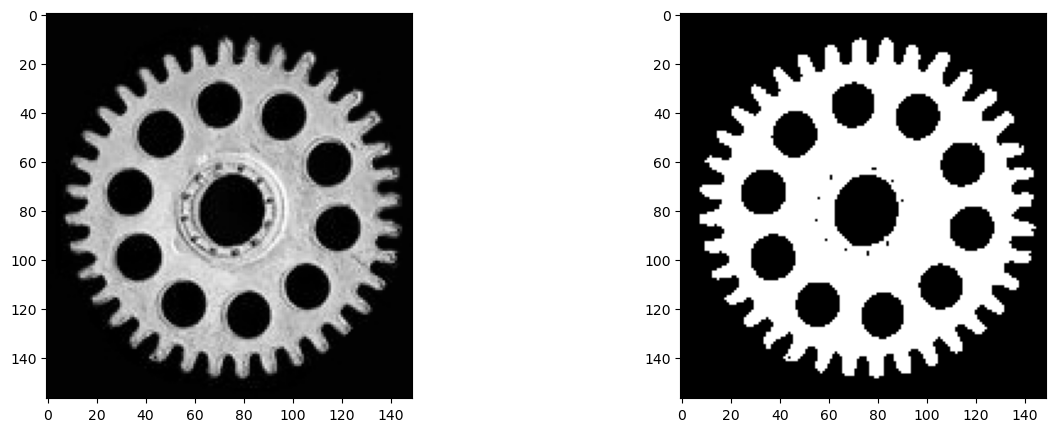

In [2]:
image = cv2.imread("trybik.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.bitwise_not(image)
image_b = image > 60
image_b=image_b.astype("uint8")

contours, hierarchy = cv2.findContours(image_b, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

plot(image, image_b)

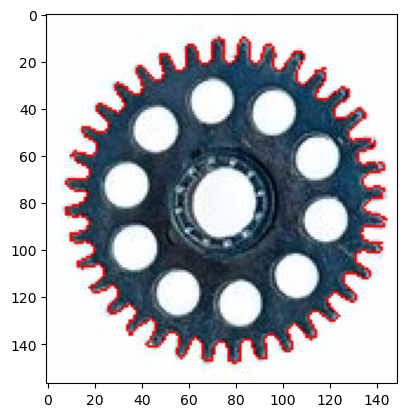

In [3]:
image = cv2.imread("trybik.jpg")
cv2.drawContours(image, contours, 0, (255,0,0))
plt.imshow(image)

In [4]:
# image = cv2.imread("trybik.jpg", cv2.IMREAD_GRAYSCALE)
# sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
# sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
# am = np.sqrt(np.power(sobelx, 2) + np.power(sobely, 2))
# am = am/np.max(am)
# orien = np.arctan2(sobely, sobelx)
# plot(image, sobelx, sobely, am, orien)

In [5]:
ref = cv2.moments(image_b, 1)

76.5 79.24679160725199


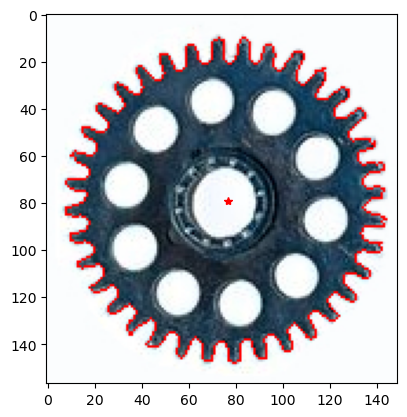

In [6]:
center_y, center_x = ref["m01"]/ref["m00"], ref["m10"]/ref["m00"]
print(center_x, center_y)
plt.imshow(image, cmap="gray")
plt.plot(center_x, center_y, "*", color="red")

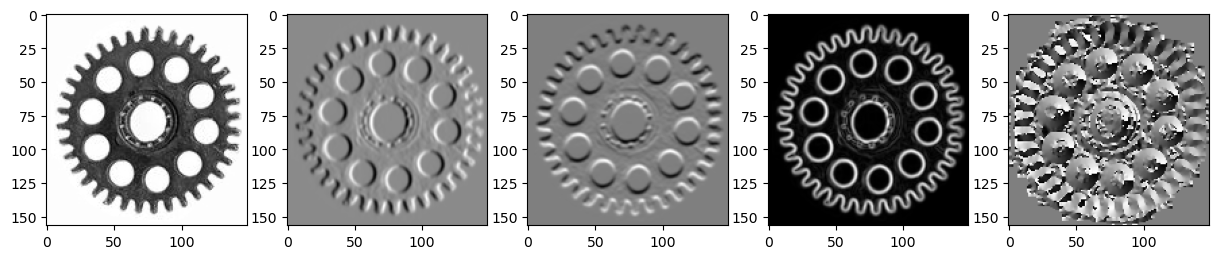

In [11]:
image = cv2.imread("trybik.jpg", cv2.IMREAD_GRAYSCALE)

# image = cv2.bitwise_not(image)

sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

am = np.sqrt(np.power(sobelx, 2) + np.power(sobely, 2))
am = am/np.max(am)

orien = np.arctan2(sobely, sobelx)

plot(image, sobelx, sobely, am, orien)

Rtable = [[] for _ in range (360)]

for point in contours[0]:
    x, y  = point[0]

    y_to_center, x_to_center = center_y - y, center_x - x
    
    aplha = np.arctan2(y_to_center, x_to_center)

    r_angle = int(round(np.degrees(orien[y,x]) + 180)) % 360

    dist = np.sqrt((center_x-x)**2 + (center_y-y)**2)
    
    Rtable[r_angle].append([dist, aplha])


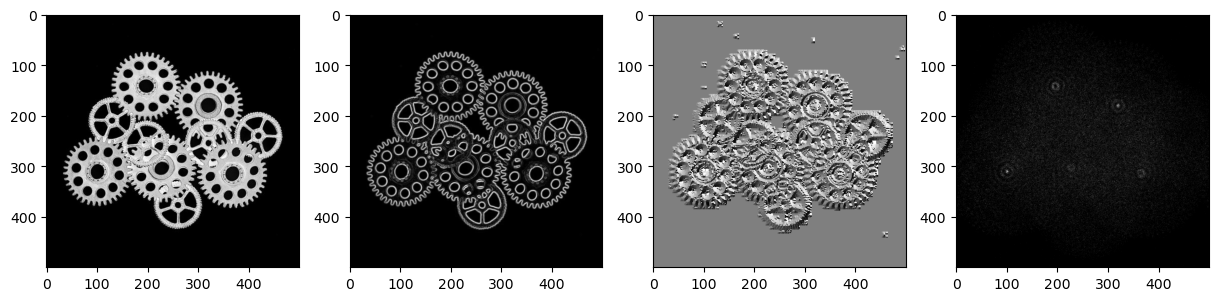

In [13]:
image = cv2.imread("trybiki2.jpg", cv2.IMREAD_GRAYSCALE)

image = cv2.bitwise_not(image)

sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

am = np.sqrt(np.power(sobelx, 2) + np.power(sobely, 2))
am = am/np.max(am)

orien = np.arctan2(sobely, sobelx)

hough = np.zeros(image.shape)

counter = 0

for y in range(len(am)):
    for x in range(len(am[y])):
        counter +=1
        if am[y,x]>=0.01:
            ang = int(round(np.degrees(orien[y,x]) + 180)) % 360

            for point in Rtable[ang]:
                x1 = int(-point[0] * np.cos(point[1]) + x)
                y1 = int(-point[0] * np.sin(point[1]) + y)
                if y1 < 500 and x1 < 500:
                    hough[y1, x1] += 1

plot(image, am, orien, hough)

In [14]:
hough_max = np.where(hough.max()*0.66 <= hough)
hough_max

(array([181, 309, 311, 311, 312], dtype=int64),
 array([319, 100, 101, 102, 100], dtype=int64))

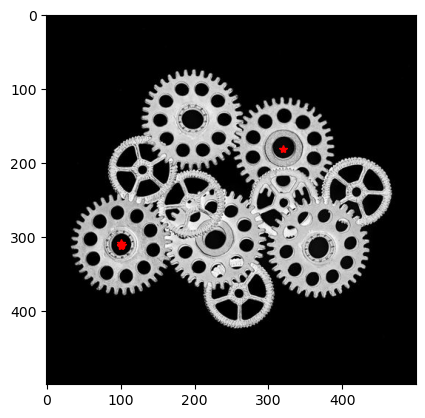

In [15]:
plt.imshow(image, cmap="gray")
plt.plot([h for h in hough_max[1]], [h for h in hough_max[0]], "*", color="red")
# plt.plot(hough_max[1][0], hough_max[0][0], "*", color="red")
# plt.plot(hough_max[1][1], hough_max[0][1], "*", color="red")